In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from score import collect_data, score
import os
from scipy import stats
import math

# Plotting Functions

In [2]:
def compare_distributions(sets, variable, categories=["A","B"], save=True):
    """ Visualize and test if two distributions are significantly different
    
    Plots violin, box and histogram. Uses t test to compare.
    
    args:
        sets: list of two numpy arrays to compare
        variable: name of the variable under consideration e.g. pose_Rx
        categories: names of subsets of the variable under consideration e.g. [Correct, Incorrect]
    """
    title=f"Comparing Distributions of {variable}"
    max_category_text_size=22
    t, p = stats.ttest_ind(sets[0], sets[1])
     
    text=""
    if p/2 < .05:
        text = "\nDistributions PROBABLY SIGNIFICANTLY Different"
        title = "*"+title+"*"  
    
    text = text+f"\nt-value = {t:.04f} \np-value = {p/2:.04f}"

    categories = [c[:max_category_text_size] for c in categories]
    for i in range(len(categories)):
        text = text + f"\nMean of {categories[i]}: {np.mean(sets[i]):.04f}"
        text = text + f"\nStandard Deviation of  {categories[i]}: {np.std(sets[i]):.04f}"
    text = text + f"\nEffect Size: {(np.mean(sets[1])-np.mean(sets[0]))/np.std(sets[0]):.04f}"
        
        
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

    axes[0].violinplot(sets,showmeans=False,showmedians=True)
    axes[0].set_title(title)

    axes[1].boxplot(sets)
    axes[1].set_title(title)

    axes[2].hist(sets, 40, density=False, histtype='bar', stacked=False, label=categories)
    axes[2].set_title(title)
    axes[2].legend(prop={'size': 10})
    axes[2].set_ylabel("samples")
    axes[2].set_xlabel(variable)

    # adding horizontal grid lines
    for ax in axes:
        ax.yaxis.grid(True)
        if ax != axes[2]:
            ax.set_xticks([y + 1 for y in range(len(sets))])
            ax.set_xlabel("")
            ax.set_ylabel(variable)
    axes[1].set_xlabel(text)
    
    plt.setp(axes[:2], xticks=[y + 1 for y in range(len(sets))],xticklabels=categories)
    plt.show()

# Load all Data

In [201]:
df_list = []
folders = os.listdir("data")
for folder in folders:
    if not os.path.isdir(os.path.join("data", folder)):
        continue
    if os.path.exists(f"data/{folder}/analysis_df_kalin.feather"):
        df_list.append(pd.read_feather(f"data/{folder}/analysis_df_kalin.feather"))

full_df = pd.concat(df_list)

# Fixing the df

lower_bound = 0
upper_bound = 1
m = (lower_bound-upper_bound)/75
full_df["ang_mult"] = (full_df["p1_ang"].values + full_df["p2_ang"].values)*.5  * ((180/math.pi) * m) + upper_bound
full_df["at_mult"] = (full_df["p1_at"].values + full_df["p2_at"].values)*.5


# print(full_df.shape)
# print(full_df.columns)

for l in ["SPEECH", "TURN"]:
    for m in ["TCN","BLSTM"]:
        for f in ["SYNCNET","PERFECTMATCH"]:
            for n in ["1LAYER","2LAYER"]:
                full_df[f'{n}_{l}_{m}_{f}'] = math.e**full_df[f'{n}_{l}_{m}_{f}-1Conf'].values
                full_df.drop([f'{n}_{l}_{m}_{f}-0Conf', f'{n}_{l}_{m}_{f}-1Conf'], axis=1, inplace=True)
#                 plt.show()


print(full_df.shape)
print(full_df.columns)


pose = ["pose_Rx", "pose_Ry"]
original_conf = ["sConf","pConf"]
speech_conf = [c for c in full_df.columns if "-SPEECH" in c]
turn_conf = [c for c in full_df.columns if "-TURN" in c]
ang = ["p1_ang","p2_ang"]
at = ["p1_at","p2_at"]
mult = ["ang_mult","at_mult"]


# display(full_df)

(1474144, 28)
Index(['SPEECH-LABEL', 'TURN-LABEL', 'sConf', 'pConf', 'p1_ang', 'p2_ang',
       'p1_at', 'p2_at', 'pose_Rx', 'pose_Ry', 'ang_mult', 'at_mult',
       '1LAYER_SPEECH_TCN_SYNCNET', '2LAYER_SPEECH_TCN_SYNCNET',
       '1LAYER_SPEECH_TCN_PERFECTMATCH', '2LAYER_SPEECH_TCN_PERFECTMATCH',
       '1LAYER_SPEECH_BLSTM_SYNCNET', '2LAYER_SPEECH_BLSTM_SYNCNET',
       '1LAYER_SPEECH_BLSTM_PERFECTMATCH', '2LAYER_SPEECH_BLSTM_PERFECTMATCH',
       '1LAYER_TURN_TCN_SYNCNET', '2LAYER_TURN_TCN_SYNCNET',
       '1LAYER_TURN_TCN_PERFECTMATCH', '2LAYER_TURN_TCN_PERFECTMATCH',
       '1LAYER_TURN_BLSTM_SYNCNET', '2LAYER_TURN_BLSTM_SYNCNET',
       '1LAYER_TURN_BLSTM_PERFECTMATCH', '2LAYER_TURN_BLSTM_PERFECTMATCH'],
      dtype='object')


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


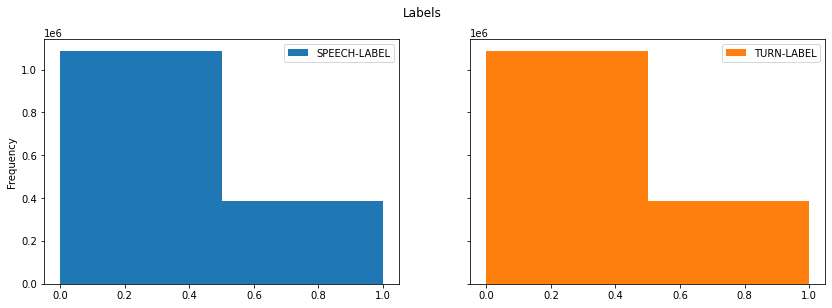

In [192]:
s=(14,4.5)
full_df[['SPEECH-LABEL', 'TURN-LABEL']].plot(kind='hist',subplots=True,sharex=True,sharey=True,title='Labels',bins=2, layout=[1,2],figsize=s)
plt.show()

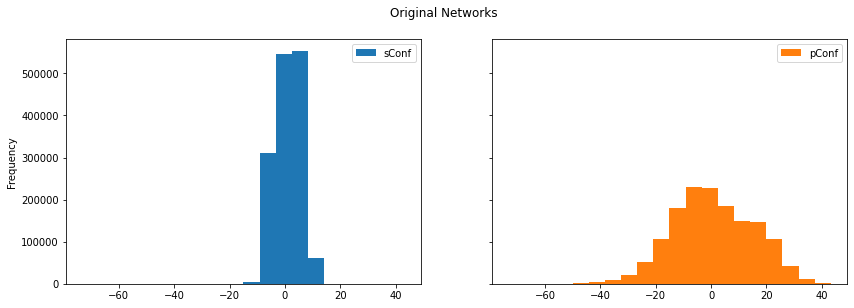

In [195]:
full_df[["sConf","pConf"]].plot(kind='hist',subplots=True,sharey=True,title=f'Original Networks',bins=20,layout=[1,2],figsize=s)
plt.show()

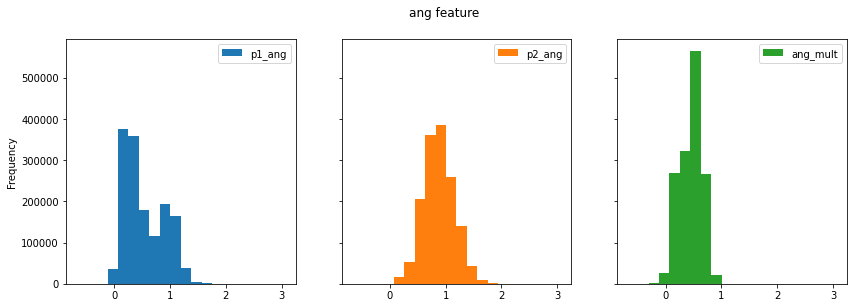

In [194]:
full_df[["p1_ang","p2_ang", "ang_mult"]].plot(kind='hist',subplots=True,sharey=True,title=f'ang feature',bins=20,layout=[1,3],figsize=s)
plt.show()

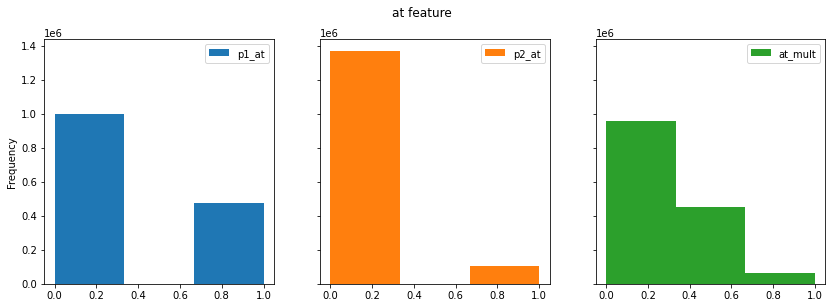

In [124]:
full_df[["p1_at","p2_at","at_mult"]].plot(kind='hist',subplots=True,sharey=True,title=f'at feature',bins=3,layout=[1,3],figsize=s)
plt.show()

In [234]:
display(full_df[["pose_Rx","pose_Ry"]])
full_df[["pose_Rx","pose_Ry"]].plot(kind='hist',subplots=True,sharey=True,title=f'head pose',bins=20,layout=[1,2],figsize=s)
plt.show()

,pose_Rx,pose_Ry
0,-0.363,0.177
1,-0.361,0.159
2,-0.359,0.156
3,-0.360,0.159
4,-0.359,0.156
...,...,...
38747,-0.316,-0.413
38748,-0.314,-0.413
38749,-0.315,-0.415
38750,-0.310,-0.415


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

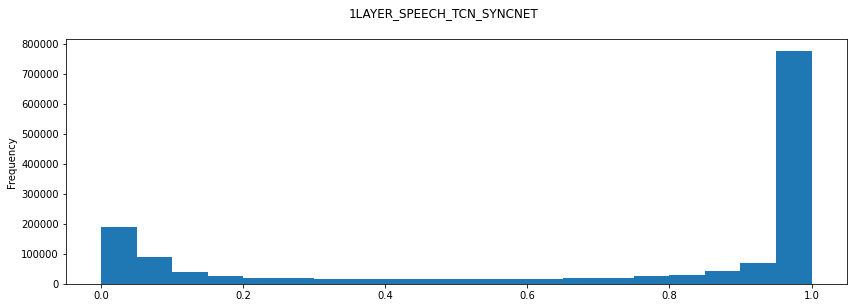

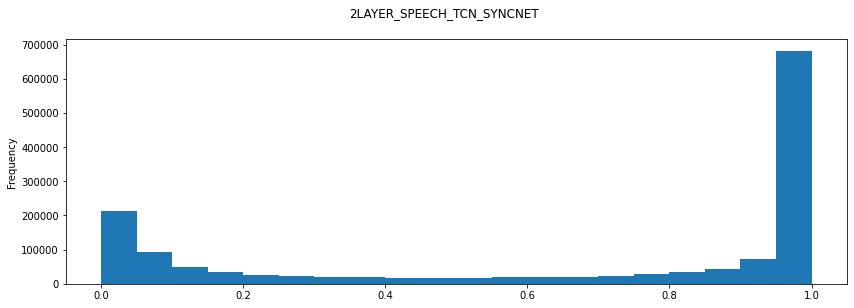

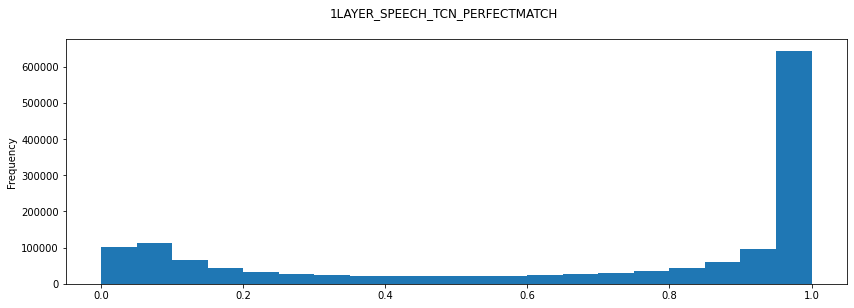

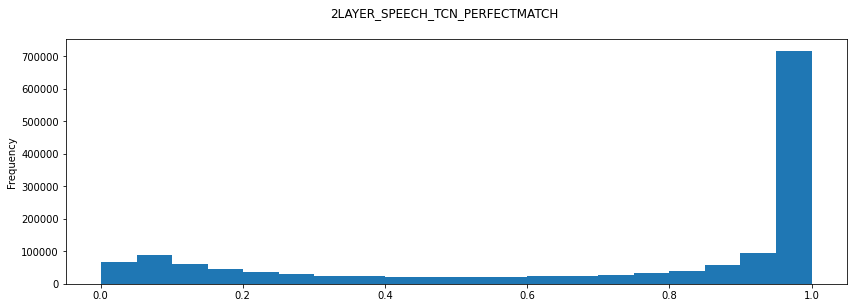

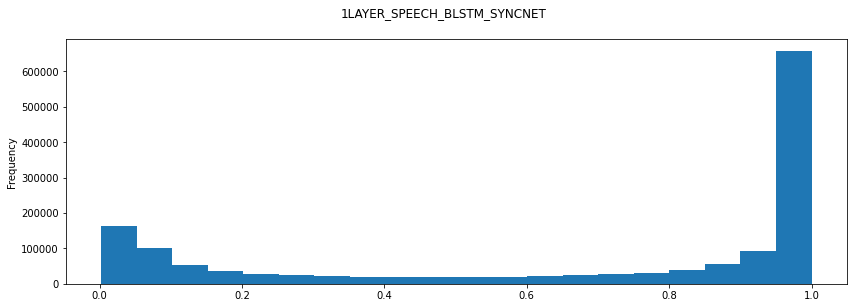

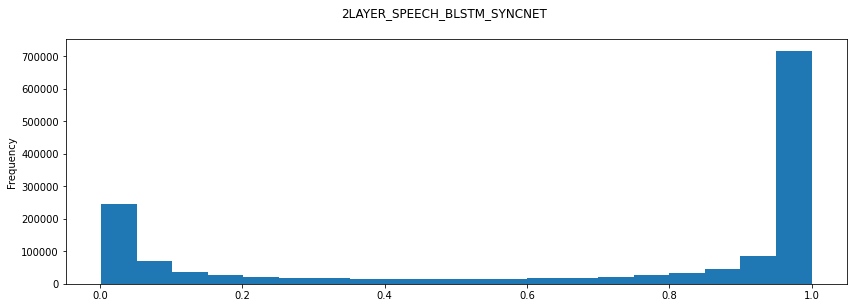

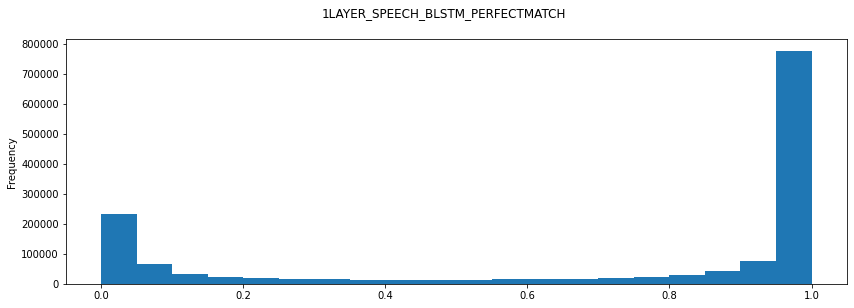

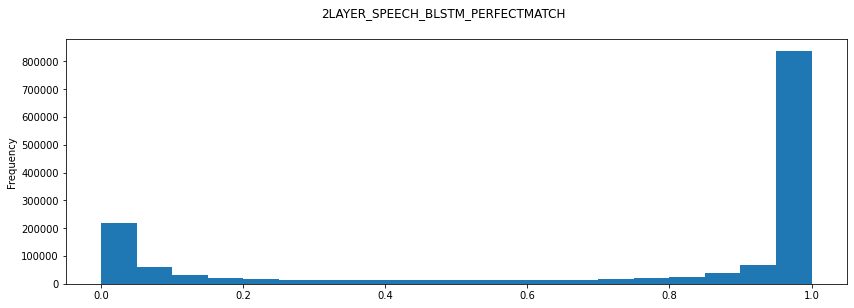

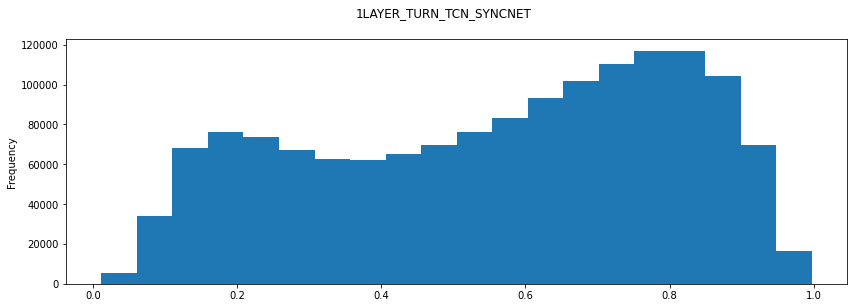

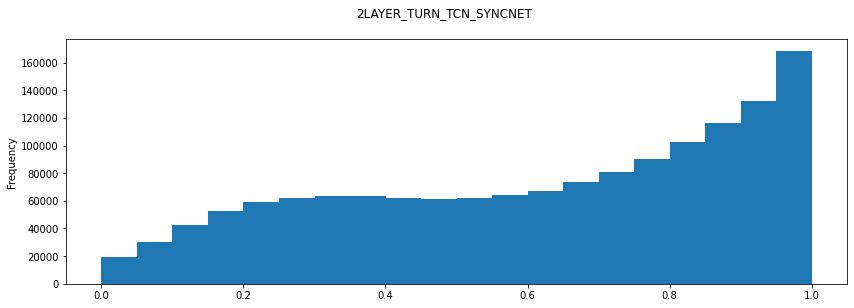

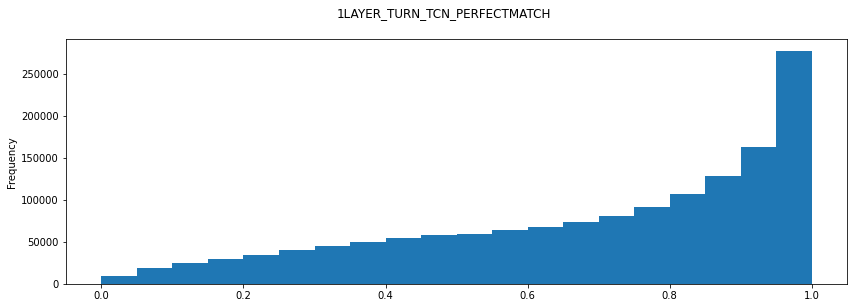

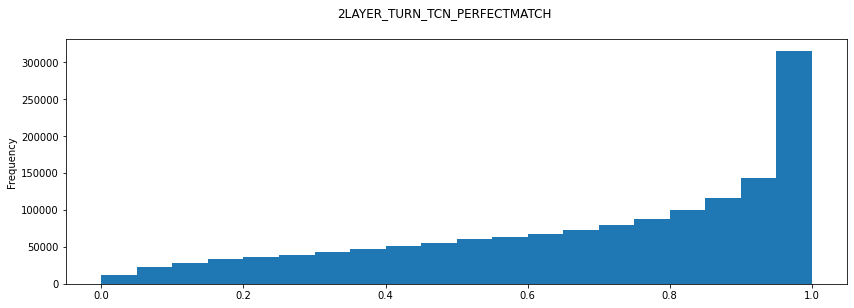

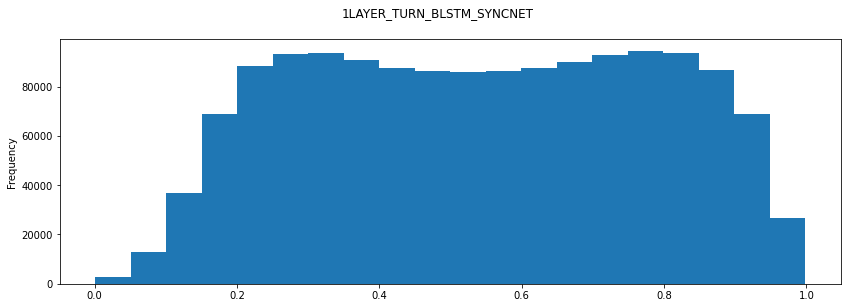

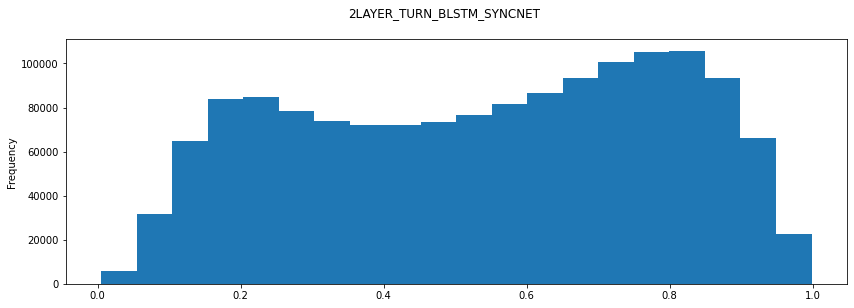

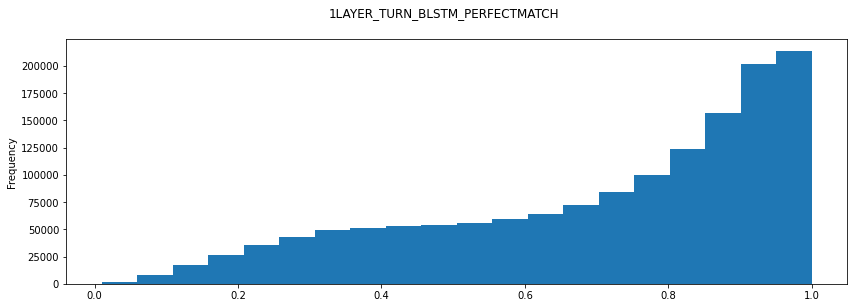

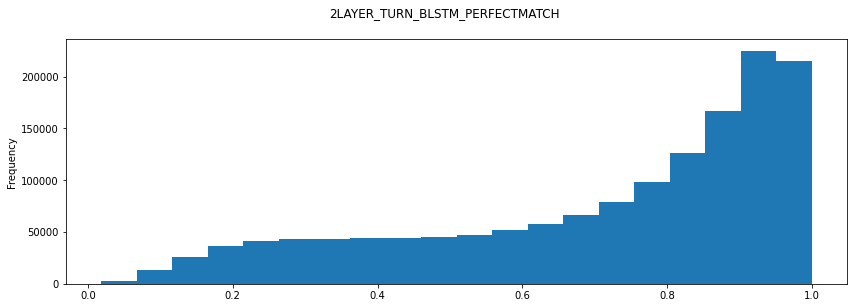

In [202]:
for l in ["SPEECH", "TURN"]:
    for m in ["TCN","BLSTM"]:
        for f in ["SYNCNET","PERFECTMATCH"]:
            for n in ["1LAYER","2LAYER"]:
                full_df[f'{n}_{l}_{m}_{f}'].plot(kind='hist',subplots=True,sharey=True,title=f'{n}_{l}_{m}_{f}',bins=20,layout=[1,1],figsize=s) 
                plt.show()

# Score Data

In [203]:
def score_df(df, label="SPEECH",print_df=True, plot=False):
    #acc, f1, auroc, mAP = score(targets, outputs)
    scores = {}
    # Score original models
    for m in ["sConf","pConf"]:
        outputs1 = df[m].values
        outputs0 = -1* df[m].values
        outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

        acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
        scores[m] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
        
    # Score Gaze Features   
    outputs1 = df["ang_mult"].values
    outputs0 = 1-outputs1
    outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

    acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
    scores[f'ang'] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
    
    outputs1 = df["at_mult"].values
    outputs0 = 1-outputs1
    outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

    acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
    scores[f'at'] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
    
    # Score newly trained models
    for m in ["TCN","BLSTM"]:
        for f in ["SYNCNET","PERFECTMATCH"]:
            for n in ["1LAYER","2LAYER"]:
                outputs1 = df[f'{n}_{label}_{m}_{f}'].values
                outputs0 = 1-outputs1
                outputs = np.array(list(zip(outputs0,outputs1)), dtype=object)

                acc, f1, auroc, mAP = score(df[f"{label}-LABEL"].values, outputs)
                scores[f'{n}_{m}_{f}'] = {"acc":acc,"f1":f1,"auROC":auroc,"mAP":mAP}
    df = pd.DataFrame(scores)
    if print_df:
        print(df)
    if plot:
        df.transpose().plot(kind='bar',title=f'Performance on {label}',figsize=(20,6),rot=25)
        plt.show()
    
    return scores


          sConf     pConf       ang        at  1LAYER_TCN_SYNCNET  \
acc    0.624708  0.732300  0.617954  0.760950            0.469180   
f1     0.554743  0.648691  0.487109  0.220778            0.447648   
auROC  0.694478  0.920787  0.708261  0.602640            0.647228   
mAP    0.614832  0.889063  0.676302  0.570229            0.605825   

       2LAYER_TCN_SYNCNET  1LAYER_TCN_PERFECTMATCH  2LAYER_TCN_PERFECTMATCH  \
acc              0.504515                 0.483919                 0.469629   
f1               0.458138                 0.453021                 0.459662   
auROC            0.656200                 0.661297                 0.674330   
mAP              0.608236                 0.623778                 0.631943   

       1LAYER_BLSTM_SYNCNET  2LAYER_BLSTM_SYNCNET  1LAYER_BLSTM_PERFECTMATCH  \
acc                0.491436              0.481114                   0.464514   
f1                 0.455124              0.446923                   0.444026   
auROC             

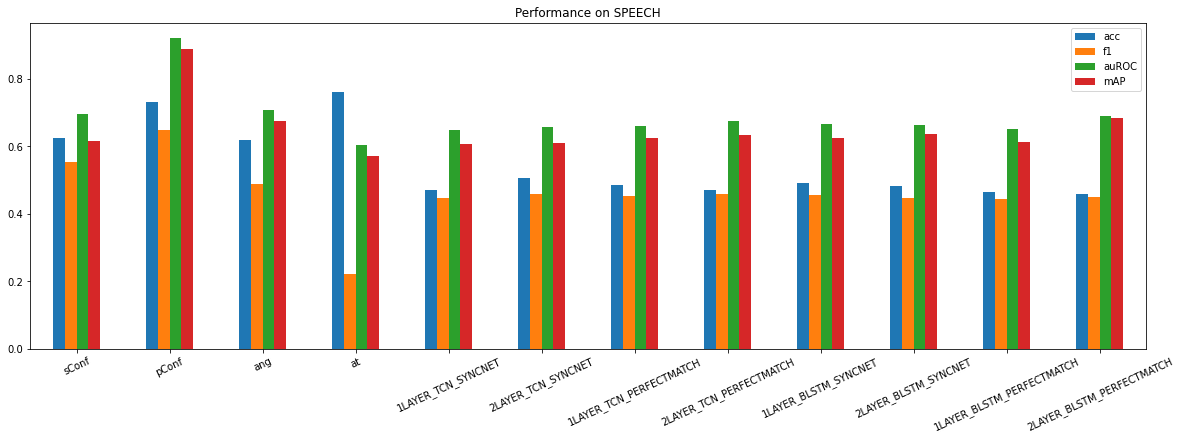

In [204]:
s = score_df(full_df, label="SPEECH",print_df=True,plot=True)
# display(full_df) 

          sConf     pConf       ang        at  1LAYER_TCN_SYNCNET  \
acc    0.622709  0.719040  0.614999  0.759862            0.541725   
f1     0.552384  0.631300  0.483158  0.217290            0.473103   
auROC  0.699641  0.896512  0.702215  0.600412            0.702537   
mAP    0.618545  0.856509  0.670223  0.568093            0.656217   

       2LAYER_TCN_SYNCNET  1LAYER_TCN_PERFECTMATCH  2LAYER_TCN_PERFECTMATCH  \
acc              0.488793                 0.442152                 0.439264   
f1               0.439502                 0.450994                 0.446292   
auROC            0.603382                 0.654949                 0.628366   
mAP              0.565026                 0.607888                 0.582724   

       1LAYER_BLSTM_SYNCNET  2LAYER_BLSTM_SYNCNET  1LAYER_BLSTM_PERFECTMATCH  \
acc                0.539278              0.541650                   0.432068   
f1                 0.433484              0.447358                   0.451150   
auROC             

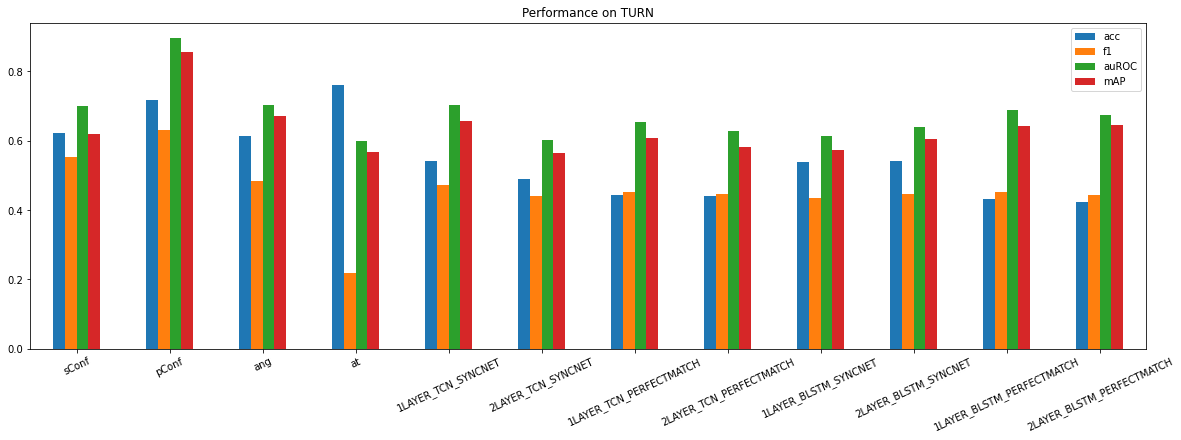

In [205]:
s = score_df(full_df, label="TURN",print_df=True,plot=True)


# Comparing Headpose When Models are Correct vs Incorrect

Here we can see that when the models are wrong the headpose tends to be different from when the models are right

In [6]:
def compare_correct_incorrect(plotcolumns, numlayers, model, feature, labeltype):
    print("Correct vs Incorrect When Talking")
    cond1A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] >= full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 1
    df1 = full_df[plotcolumns][cond1A & cond1B] #correct

    cond2A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] < full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks not speaking
    cond2B = full_df["SPEECH-LABEL"] == 1
    df2 = full_df[plotcolumns][cond2A & cond2B] # incorrect

    data_to_compare = [df1,df2]
    for c in plotcolumns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)
        
    print("Correct vs Incorrect When NOT Talking")
    cond1A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] < full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks not speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 0
    df1 = full_df[plotcolumns][cond1A & cond1B] #correct

    cond2A = full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-1Conf"] >= full_df[f"{numlayers}LAYER_{labeltype}_{model}_{feature}-0Conf"] #TCN thinks speaking
    cond2B = full_df["SPEECH-LABEL"] == 0
    df2 = full_df[plotcolumns][cond2A & cond2B] # incorrect

    data_to_compare = [df2,df1]
    for c in plotcolumns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)
        
def compare_correct_incorrect_original(columns, feature, labeltype):
    print("Correct vs Incorrect When Talking")
    cond1A = full_df[feature] >= 0 #Sync thinks speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 1
    df1 = full_df[columns][cond1A & cond1B] #Correct

    cond2A = full_df[feature] < 0 #Sync thinks not speaking
    cond2B = full_df[f"{labeltype}-LABEL"] == 1
    df2 = full_df[columns][cond2A & cond2B] #Incorrect
    
    print("Comparing head rotation and syncnet performance while talking")
    data_to_compare = [df1,df2]
    for c in columns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)

    print("Correct vs Incorrect When NOT Talking")
    cond1A = full_df[feature] < 0 #Sync thinks not speaking
    cond1B = full_df[f"{labeltype}-LABEL"] == 0
    df1 = full_df[columns][cond1A & cond1B] #Correct

    cond2A = full_df[feature] >= 0 #Sync thinks speaking
    cond2B = full_df[f"{labeltype}-LABEL"] == 0
    df2 = full_df[columns][cond2A & cond2B] #Incorrect
    
    print("Comparing head rotation and syncnet performance while NOT talking")
    data_to_compare = [df1,df2]
    for c in columns:
        sets = [df[c].values for df in data_to_compare]
        compare_distributions(sets, c, categories=["Correct","Incorrect"], save=False)

Correct vs Incorrect When Talking


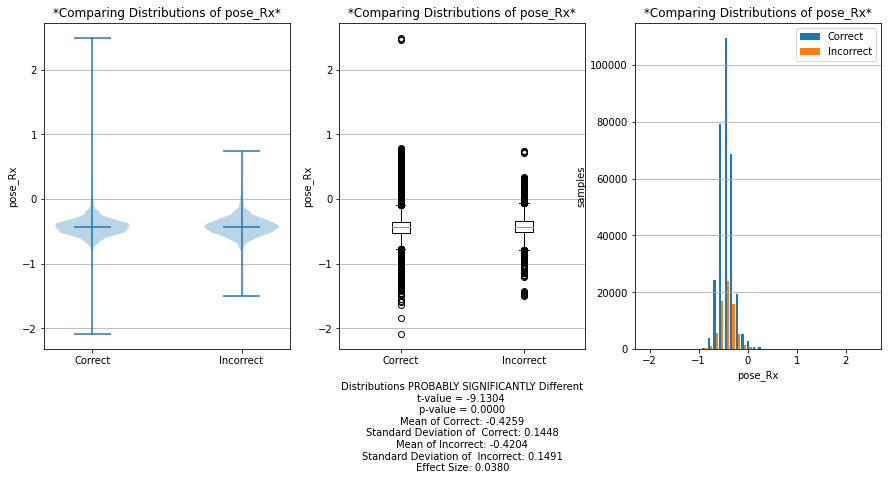

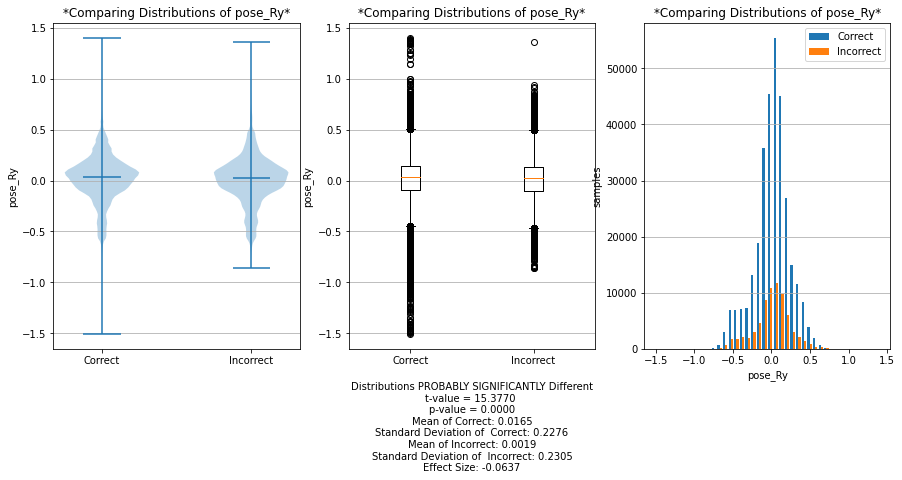

Correct vs Incorrect When NOT Talking


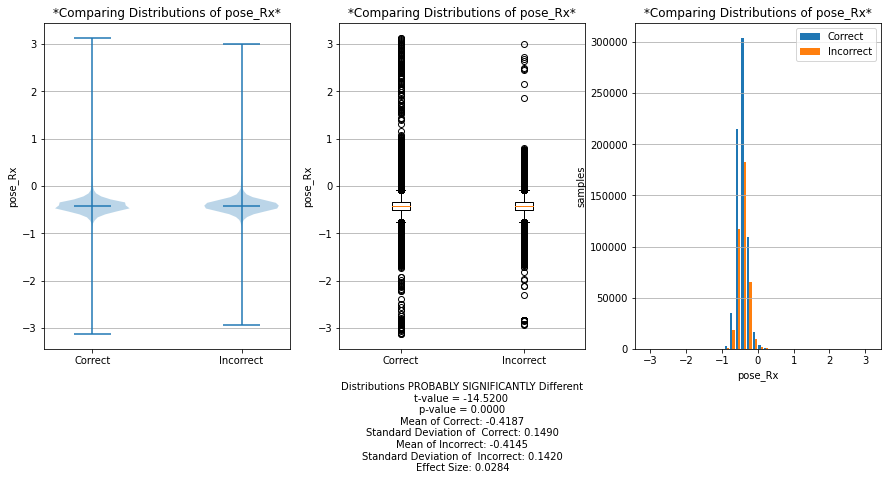

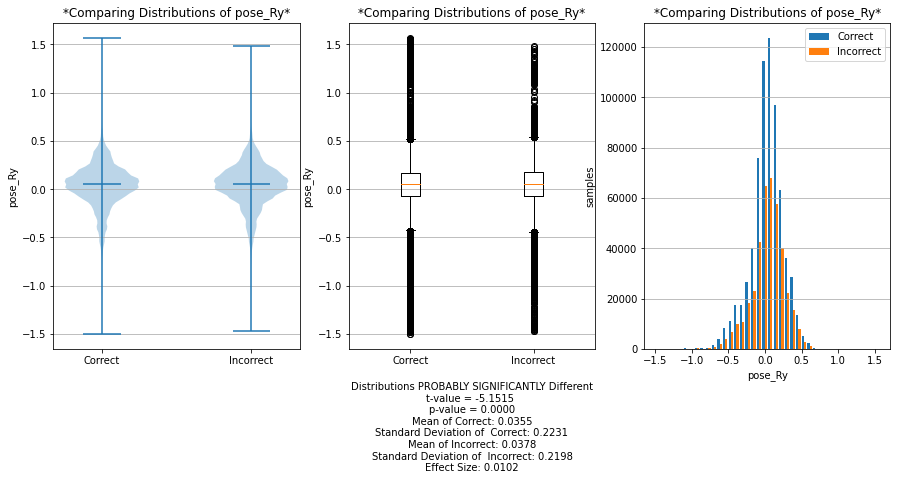

In [76]:
columns = pose
compare_correct_incorrect(pose, 1, "TCN", "PERFECTMATCH", "SPEECH")


Correct vs Incorrect When Talking
Comparing head rotation and syncnet performance while talking


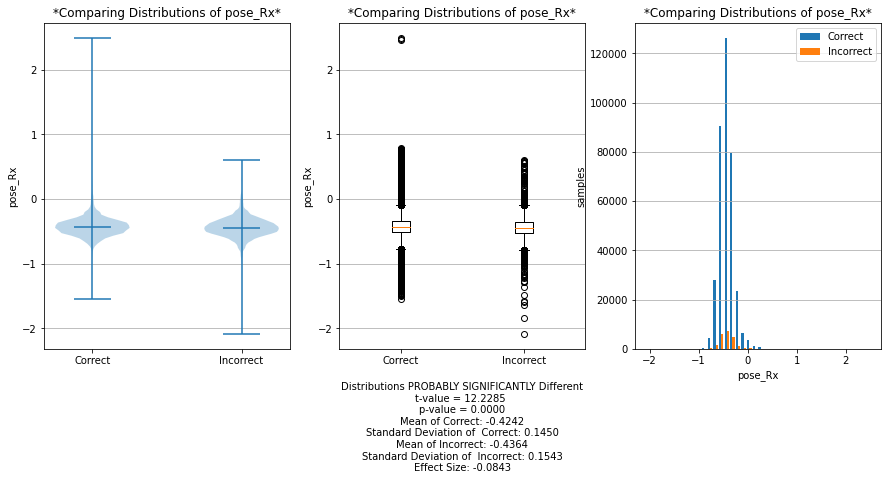

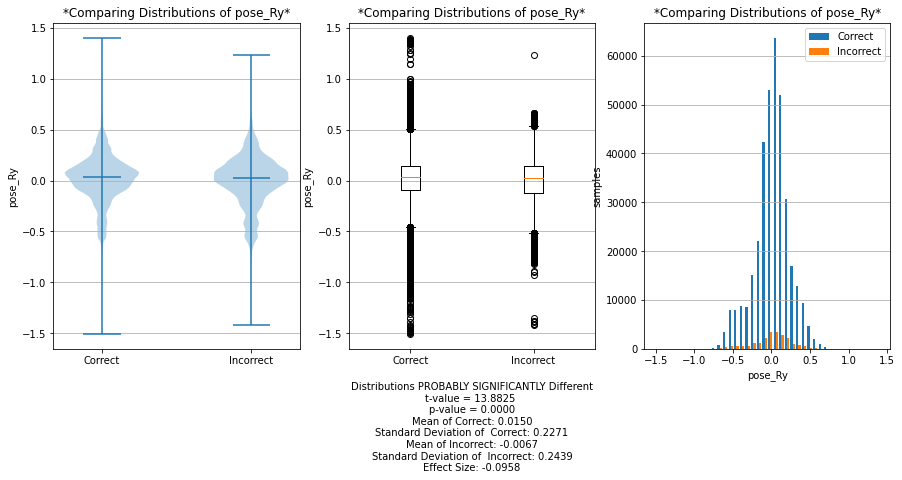

Correct vs Incorrect When NOT Talking
Comparing head rotation and syncnet performance while NOT talking


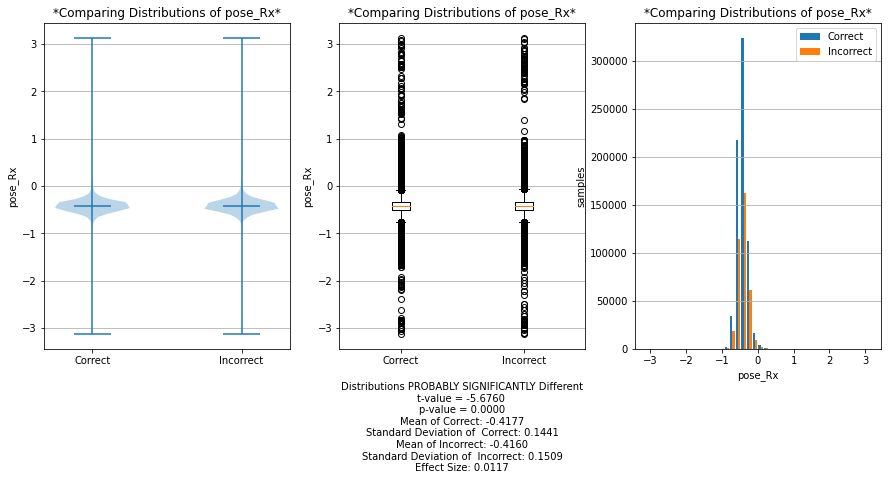

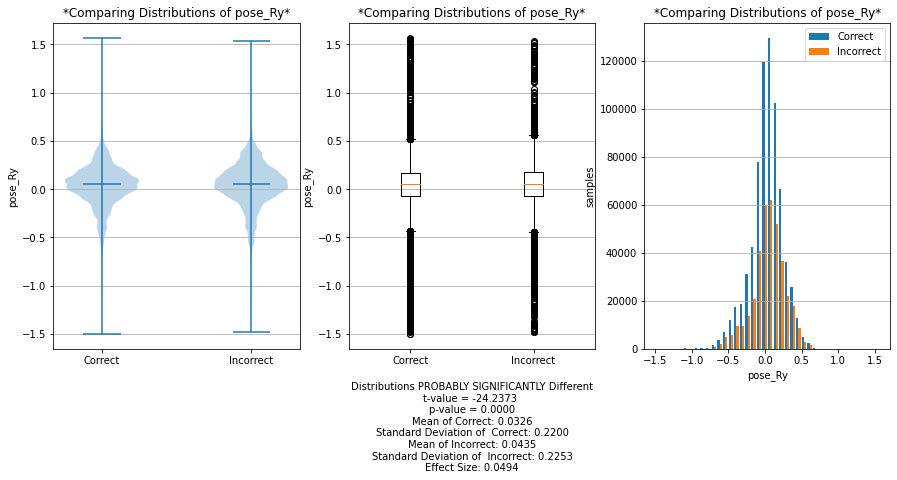

In [81]:
compare_correct_incorrect_original(pose, "pConf", "SPEECH")

# Calculating model performance for different head rotations

In [206]:
def avg_gaze(full_df, gaze_type="ang", weights=[1,1]):
    df = full_df.copy(deep=True)
    for c in df.columns:
        if c not in ["pose_Rx","pose_Ry", f"SPEECH-LABEL","TURN-LABEL","p1_ang","p2_ang","p1_at","p2_at","ang_mult","at_mult"]:
            df[c] = (df[c].values * weights[0] + df[f"{gaze_type}_mult"] * weights[1])/ sum(weights)
    return df

def mult_gaze(full_df, gaze_type="ang", weights=[1,1]):
    df = full_df.copy(deep=True)
    for c in df.columns:
        if c not in ["pose_Rx","pose_Ry", f"SPEECH-LABEL","TURN-LABEL","p1_ang","p2_ang","p1_at","p2_at","ang_mult","at_mult"]:
            df[c] = df[c].values * (df[f"{gaze_type}_mult"] + .5)
    return df

Range is -36, -31 and support is 1022
Range is -31, -25 and support is 1213
Range is -25, -19 and support is 241
Range is -19, -14 and support is 119
Range is -14, -8 and support is 233
Range is -8, -2 and support is 775
Range is -2, 3 and support is 3816
Range is 3, 9 and support is 2321
Range is 9, 15 and support is 252
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class

/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages

Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0


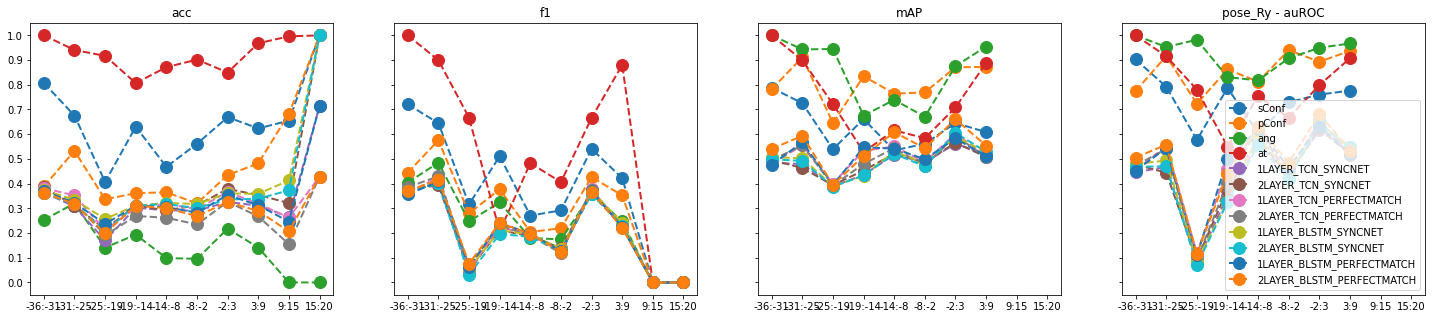

In [231]:
def calc_perf_by(df, num_windows, split_col_name, plot=False, label="SPEECH"):
    results = []
    ticks = []
    
    window = (max(df[split_col_name]) - min(df[split_col_name]))/num_windows

    for i in range(num_windows):
        rmin = min(df[split_col_name]) + window * i
        rmax = min(df[split_col_name]) + window * (i+1)
        sub_df = df[(df[split_col_name]>=rmin) & (df[split_col_name]<rmax)]

        tick = f"{rmin*180/math.pi:.0f}:{rmax*180/math.pi:.0f}"

        print(f"Range is {rmin*180/math.pi:.0f}, {rmax*180/math.pi:.0f} and support is {len(sub_df)}")
        s = score_df(sub_df, label=label, print_df=False, plot=plot)
        results.append(s)
        ticks.append(tick)
    return results,ticks

def display_perf_by(results, split_col_name, ticks, columns):
    
    r = results
    fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(25, 5))
    for i, metric in enumerate(["acc","f1","mAP", "auROC"]):
        for m in columns:
            y = [a[m][metric] for a in r]
            x = list(range(len(y)))
            axs[i].plot(x, y, marker='o', linestyle='dashed', linewidth=2, markersize=12,label=m)
            axs[i].set_title(metric)
        
        plt.xticks(ticks = x, labels=ticks)
        plt.yticks(ticks = [i/10 for i in range(11)])
    plt.title(f"{split_col_name} - {metric}")
    plt.legend()
    plt.show()
    
    
def display_perf_by_change(results,new_results, split_col_name, ticks, columns):
    
    r0 = results
    r1 = new_results
    
    fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(25, 5))
    for i, metric in enumerate(["acc","f1","mAP", "auROC"]):
        for m in columns:
            y0 = [a[m][metric] for a in r0]
            y1 = [a[m][metric] for a in r1]
            y=[y1[k]-y0[k] for k in range(len(y0))]
            
            x = list(range(len(y)))
            axs[i].plot(x, y, marker='o', linestyle='dashed', linewidth=2, markersize=12,label=m)
            axs[i].plot(x, [0 for i in range(len(y))],color="black")
            axs[i].set_title(metric)
            axs[i].grid(True)
        plt.xticks(ticks = x, labels=ticks)
        plt.yticks(ticks = [(i-5)/10 for i in range(11)])
    plt.title(f"{split_col_name} - {metric}")
    plt.legend()
    plt.show()
# pose = ["pose_Rx", "pose_Ry"]
# original_conf = ["sConf","pConf"]
# speech_conf = [c for c in full_df.columns if "-SPEECH" in c]
# turn_conf = [c for c in full_df.columns if "-TURN" in c]
# ang = ["p1_ang","p2_ang"]
# at = ["p1_at","p2_at"]
# mult = ["ang_mult","at_mult"]
buckets = 10
small_results,ticks = calc_perf_by(full_df[:10000], 10, "pose_Ry", label="SPEECH")
originals = list(small_results[0].keys())[:2]
gaze = list(small_results[0].keys())[2:4]
new = list(small_results[0].keys())[4:]
display_perf_by(small_results, "pose_Ry", ticks, originals+gaze+new)

In [216]:
original_speech_results,ticks = calc_perf_by(full_df, buckets, "pose_Ry", label="SPEECH")
original_turn_results,ticks = calc_perf_by(full_df, buckets, "pose_Ry", label="TURN")

Range is -86, -69 and support is 175
Range is -69, -51 and support is 1372
Range is -51, -34 and support is 11847
Range is -34, -16 and support is 120538
Range is -16, 2 and support is 545386
Range is 2, 19 and support is 687640
Range is 19, 37 and support is 104797
Range is 37, 55 and support is 1876
Range is 55, 72 and support is 303
Range is 72, 90 and support is 209
Range is -86, -69 and support is 175
Range is -69, -51 and support is 1372
Range is -51, -34 and support is 11847
Range is -34, -16 and support is 120538
Range is -16, 2 and support is 545386
Range is 2, 19 and support is 687640
Range is 19, 37 and support is 104797
Range is 37, 55 and support is 1876
Range is 55, 72 and support is 303
Range is 72, 90 and support is 209


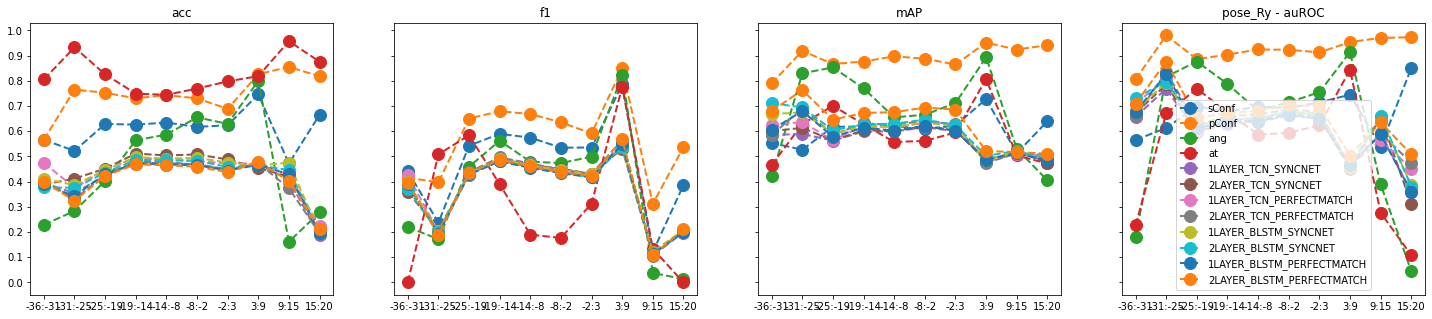

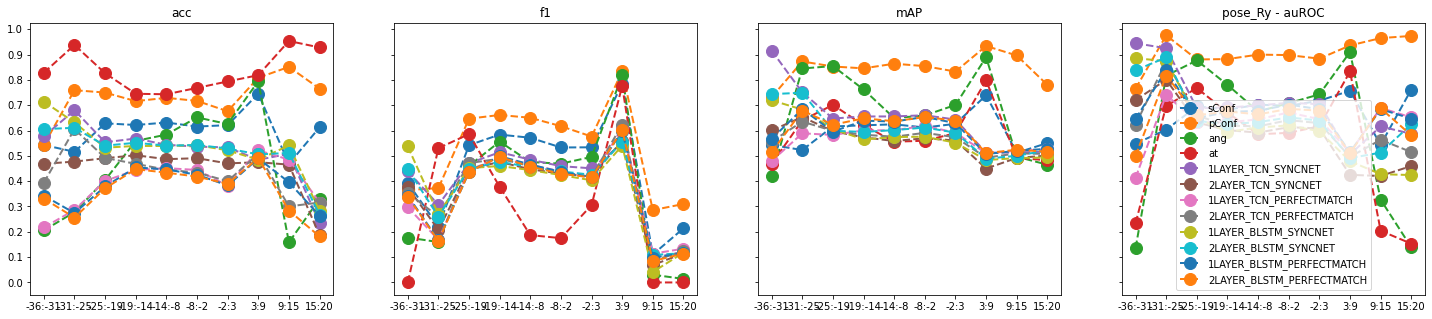

In [227]:
display_perf_by(original_speech_results, "pose_Ry", ticks, originals+gaze+new)
display_perf_by(original_turn_results, "pose_Ry", ticks, originals+gaze+new)        

## Adding Gaze

In [218]:
dfs = {}
results = {}

for gaze_type in ["ang","at"]:
    dfs[gaze_type] = {}
    dfs[gaze_type]["avg"] = avg_gaze(full_df, gaze_type=gaze_type, weights=[1,5])
    dfs[gaze_type]["mult"] = mult_gaze(full_df, gaze_type=gaze_type)
    
for label in ["TURN","SPEECH"]:
    results[label]={}
    for gaze_type, v in dfs.items():
        results[label][gaze_type]={}
        for mult_type, df in v.items():
            results[label][gaze_type][mult_type], ticks = calc_perf_by(df, buckets, "pose_Ry")

# atmult_df = avg_gaze(full_df, gaze_type="at", weights=[1,5])
# atmult_results,ticks = calc_perf_by(atmult_df, buckets, "pose_Ry")

Range is -86, -69 and support is 175
Range is -69, -51 and support is 1372
Range is -51, -34 and support is 11847
Range is -34, -16 and support is 120538
Range is -16, 2 and support is 545386
Range is 2, 19 and support is 687640
Range is 19, 37 and support is 104797
Range is 37, 55 and support is 1876
Range is 55, 72 and support is 303
Range is 72, 90 and support is 209
Range is -86, -69 and support is 175
Range is -69, -51 and support is 1372
Range is -51, -34 and support is 11847
Range is -34, -16 and support is 120538
Range is -16, 2 and support is 545386
Range is 2, 19 and support is 687640
Range is 19, 37 and support is 104797
Range is 37, 55 and support is 1876
Range is 55, 72 and support is 303
Range is 72, 90 and support is 209
Range is -86, -69 and support is 175
Range is -69, -51 and support is 1372
Range is -51, -34 and support is 11847
Range is -34, -16 and support is 120538
Range is -16, 2 and support is 545386
Range is 2, 19 and support is 687640
Range is 19, 37 and suppo

turn ang avg


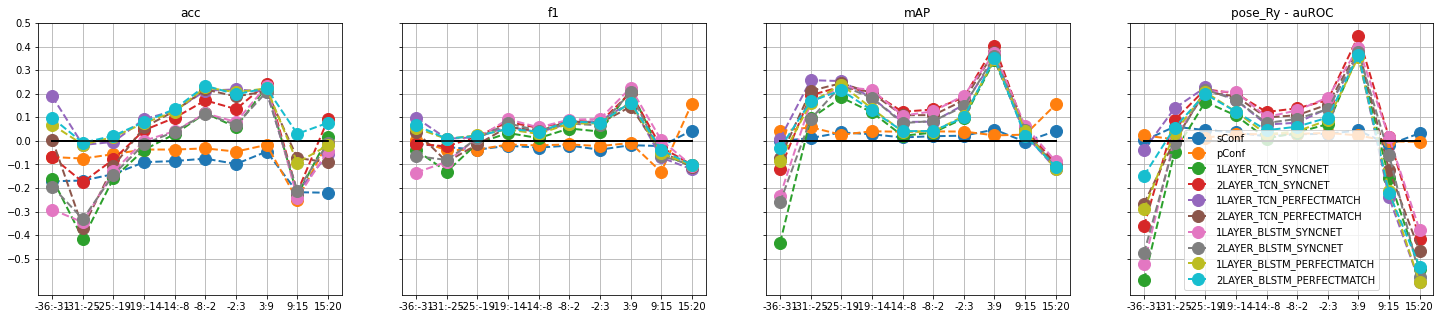

turn ang mult


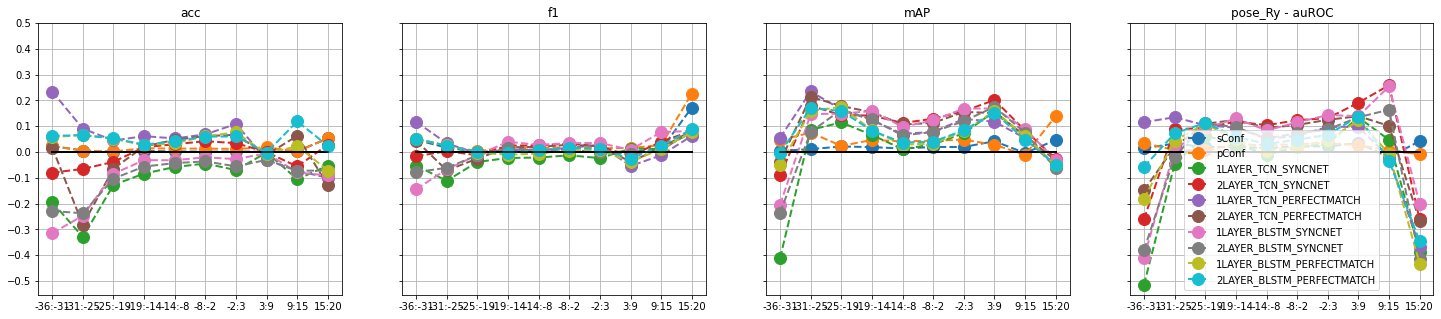

turn at avg


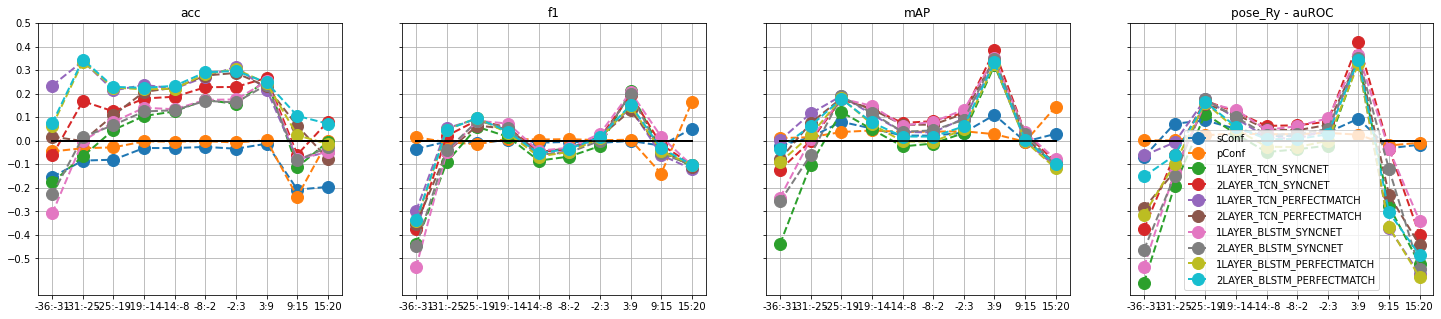

turn at mult


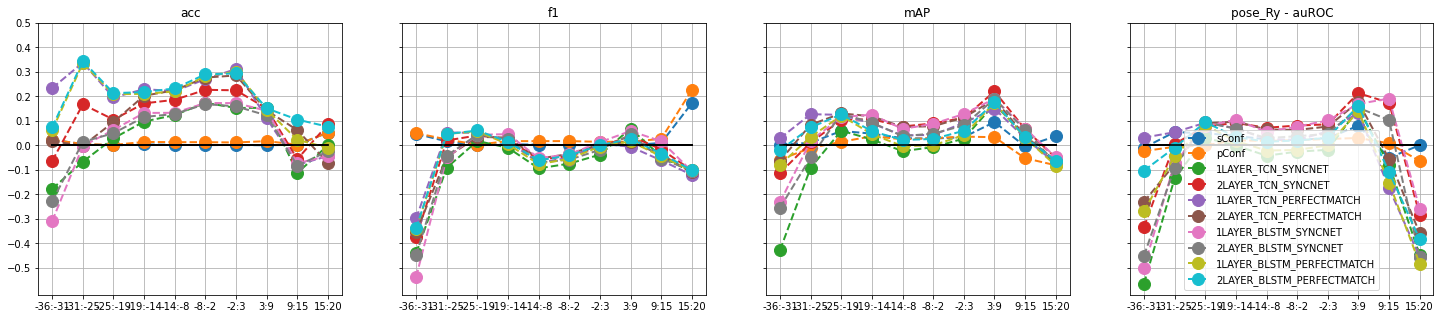

speech ang avg


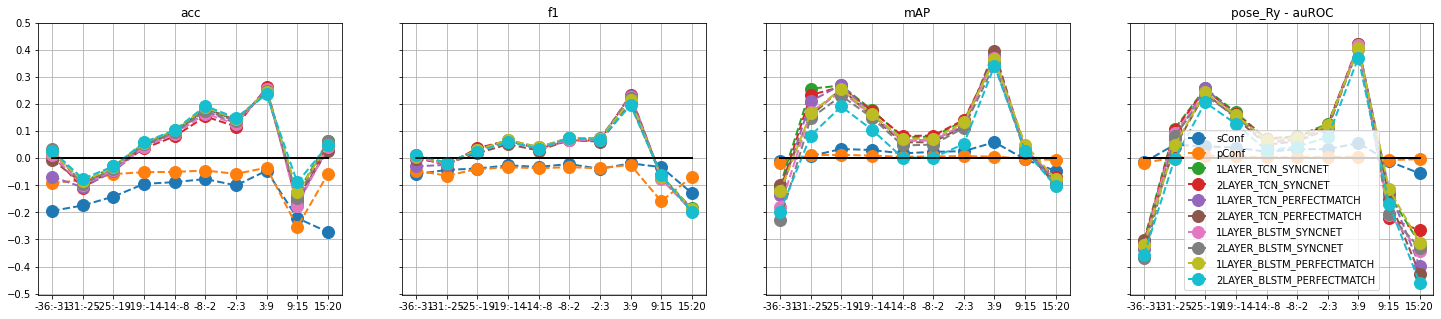

speech ang mult


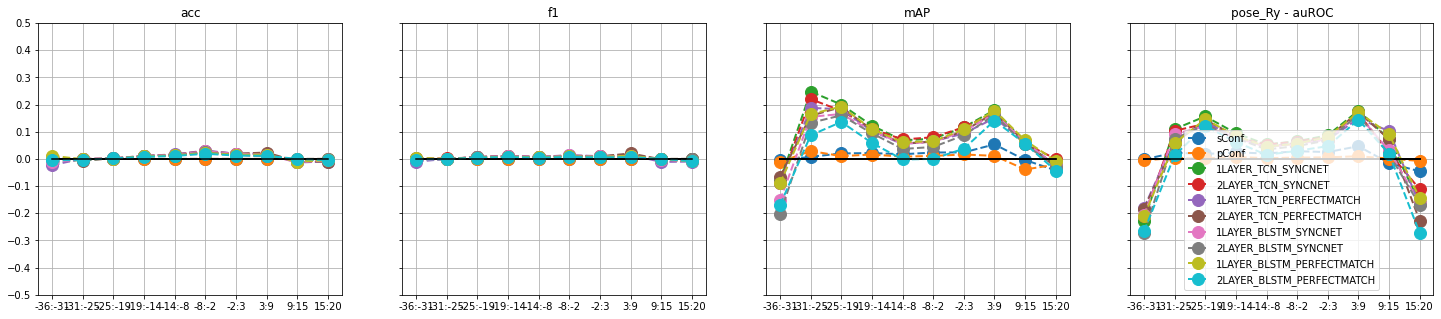

speech at avg


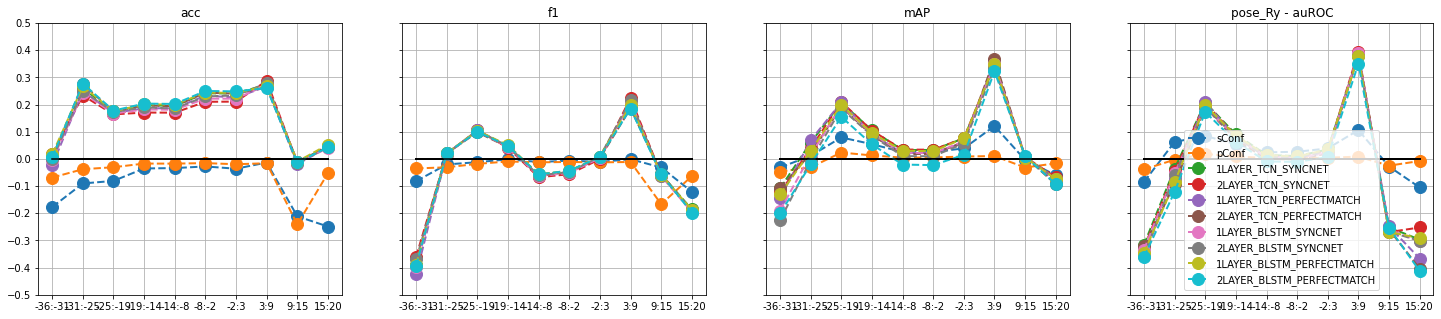

speech at mult


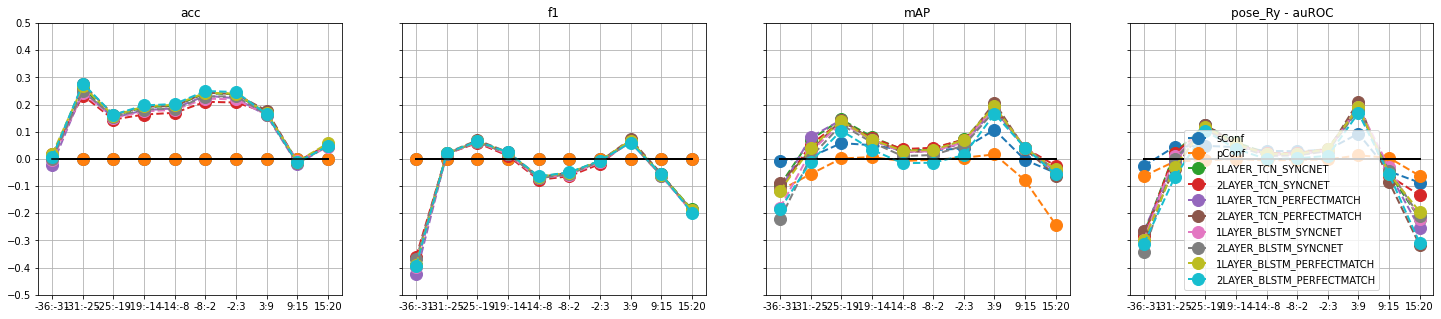

In [232]:
for gaze_type, v in dfs.items():
    for mult_type, df in v.items():
        print("turn",gaze_type, mult_type)
        display_perf_by_change(original_turn_results, results["TURN"][gaze_type][mult_type], "pose_Ry", ticks, originals+new)
        
for gaze_type, v in dfs.items():
    for mult_type, df in v.items():
        print("speech",gaze_type, mult_type)
        display_perf_by_change(original_speech_results, results["SPEECH"][gaze_type][mult_type], "pose_Ry", ticks, originals+new)
        
        

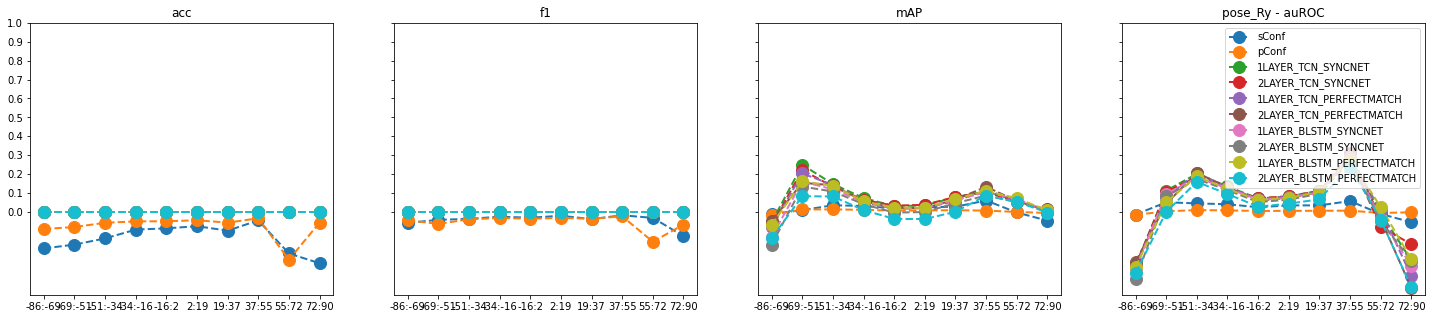

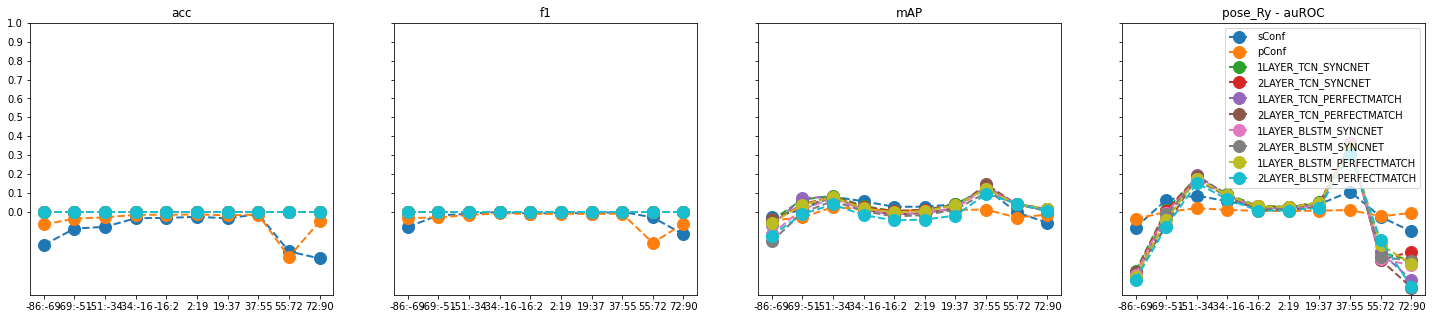

In [167]:
display_perf_by_change(results,angmult_results, "pose_Ry", ticks, originals+new)
display_perf_by_change(results,atmult_results, "pose_Ry", ticks, originals+new)


In [170]:
angmult_df = mult_gaze(full_df, gaze_type="ang", weights=[1,5])
angmult_results,ticks = calc_perf_by(angmult_df, buckets, "pose_Ry")
atmult_df = mult_gaze(full_df, gaze_type="at", weights=[1,5])
atmult_results,ticks = calc_perf_by(atmult_df, buckets, "pose_Ry")

pose_Ry range -1.509 1.569
Range is -86, -69 and support is 175
Range is -69, -51 and support is 1372
Range is -51, -34 and support is 11847
Range is -34, -16 and support is 120538
Range is -16, 2 and support is 545386
Range is 2, 19 and support is 687640
Range is 19, 37 and support is 104797
Range is 37, 55 and support is 1876
Range is 55, 72 and support is 303
Range is 72, 90 and support is 209
pose_Ry range -1.509 1.569
Range is -86, -69 and support is 175
Range is -69, -51 and support is 1372
Range is -51, -34 and support is 11847
Range is -34, -16 and support is 120538
Range is -16, 2 and support is 545386
Range is 2, 19 and support is 687640
Range is 19, 37 and support is 104797
Range is 37, 55 and support is 1876
Range is 55, 72 and support is 303
Range is 72, 90 and support is 209


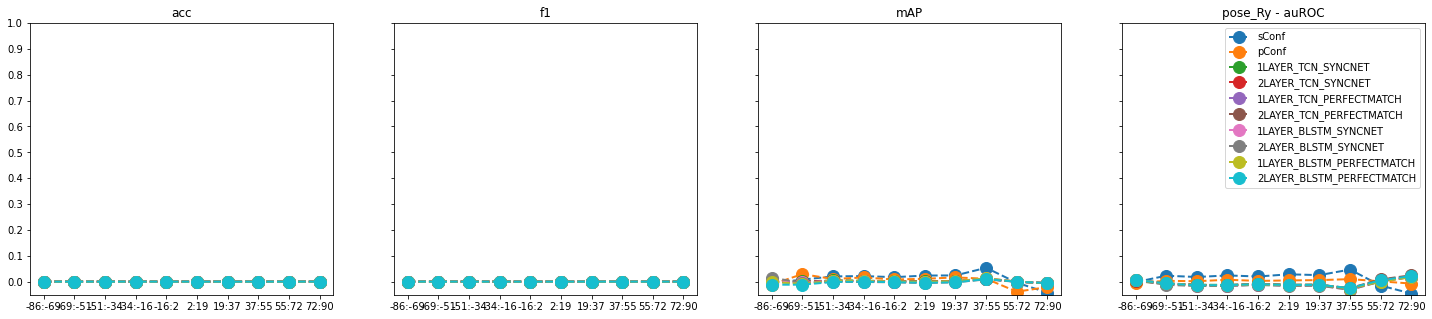

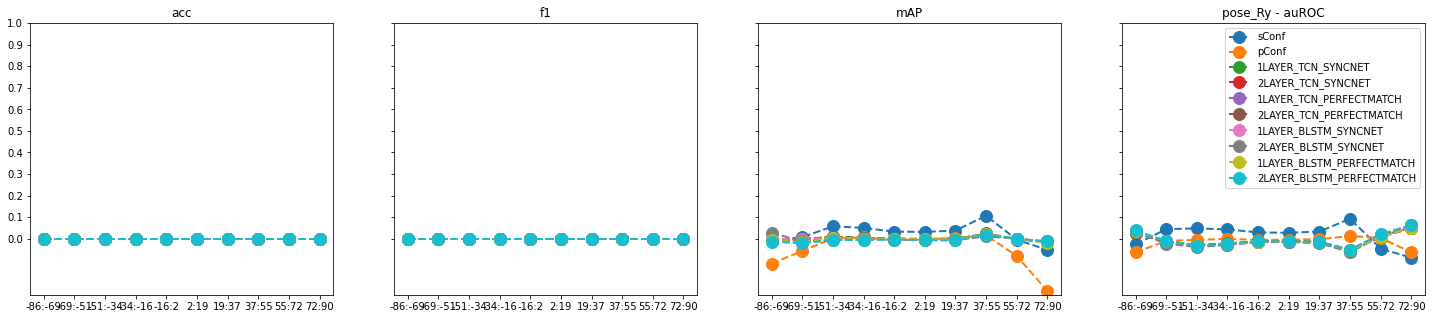

In [171]:
display_perf_by_change(results,angmult_results, "pose_Ry", ticks, originals+new)
display_perf_by_change(results,atmult_results, "pose_Ry", ticks, originals+new)

# Examine Turn Performance

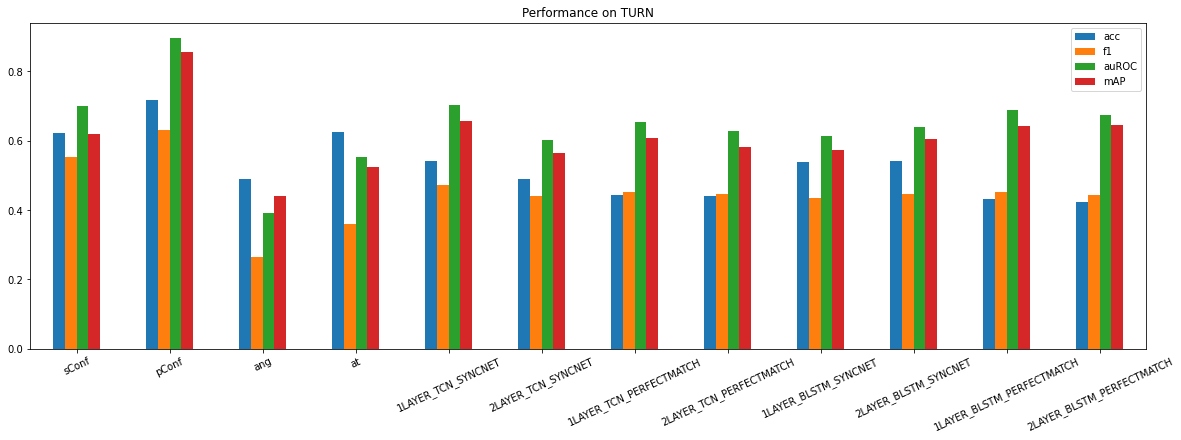

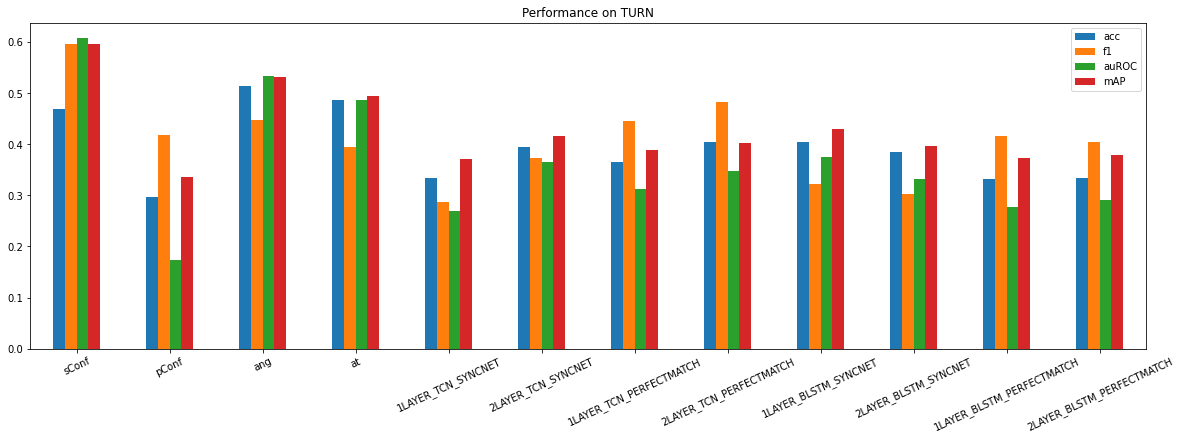

In [10]:
s = score_df(full_df, label="TURN",print_df=False,plot=True)
s = score_df(full_df[full_df[f"SPEECH-LABEL"] != full_df[f"TURN-LABEL"]], label="TURN",print_df=False,plot=True)

Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 1.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


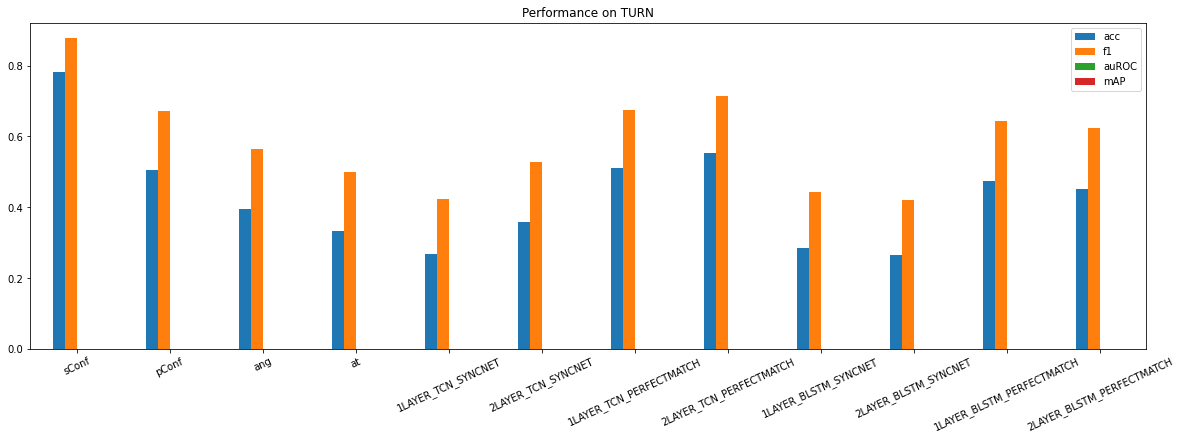

Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0
Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


Only one class present in y_true. ROC AUC score is not defined in that case. Class balance is: 0.0


/home/chris/Programs/anaconda3/envs/modenv/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


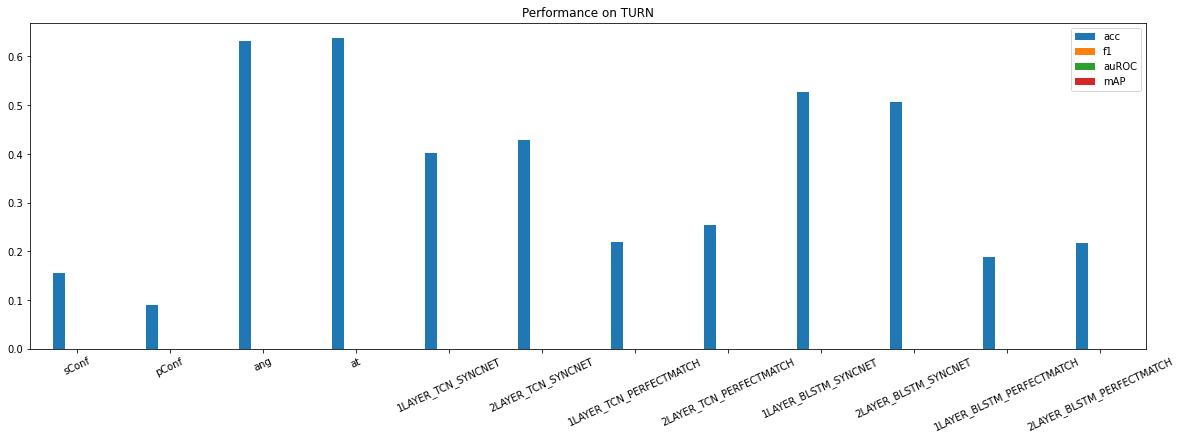

In [9]:
s = score_df(full_df[(full_df[f"SPEECH-LABEL"] ==0) & (full_df[f"TURN-LABEL"] == 1)], label="TURN",print_df=False,plot=True)
s = score_df(full_df[(full_df[f"SPEECH-LABEL"] ==1) & (full_df[f"TURN-LABEL"] == 0)], label="TURN",print_df=False,plot=True)

# Old - Ignore

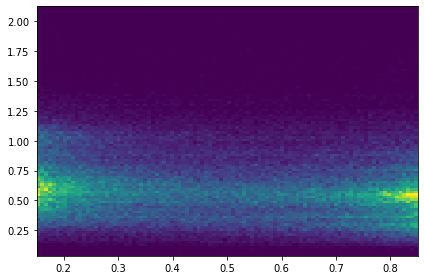

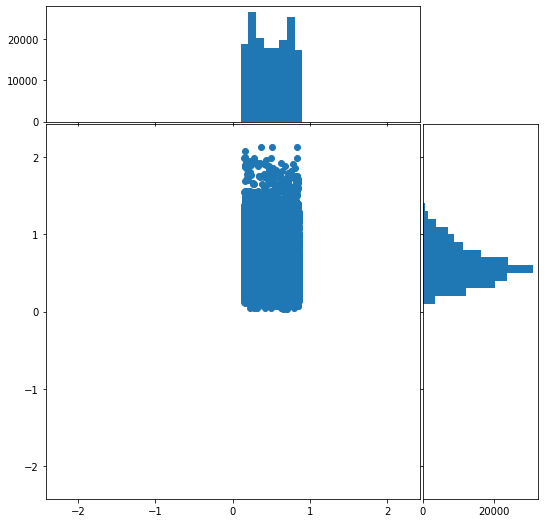

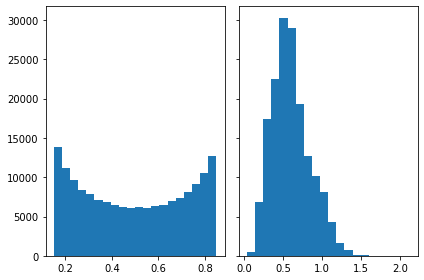

In [73]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

def double_scatter(x,y):    
    fig, ax = plt.subplots(tight_layout=True)
    hist = ax.hist2d(x, y, bins=100)
    plt.show()
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    spacing = 0.005


    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))

    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)
    ax_histy = fig.add_axes(rect_histy, sharey=ax)

    # use the previously defined function
    scatter_hist(x, y, ax, ax_histx, ax_histy)

    plt.show()

    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    n_bins=20
    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(x, bins=n_bins)
    axs[1].hist(y, bins=n_bins)
    plt.show()
    
d=(all_confidences[:,1]>=0.15) & (all_confidences[:,1]<=0.85)
x = all_confidences[d,1]
y=avg_ang[d]
double_scatter(x,y)